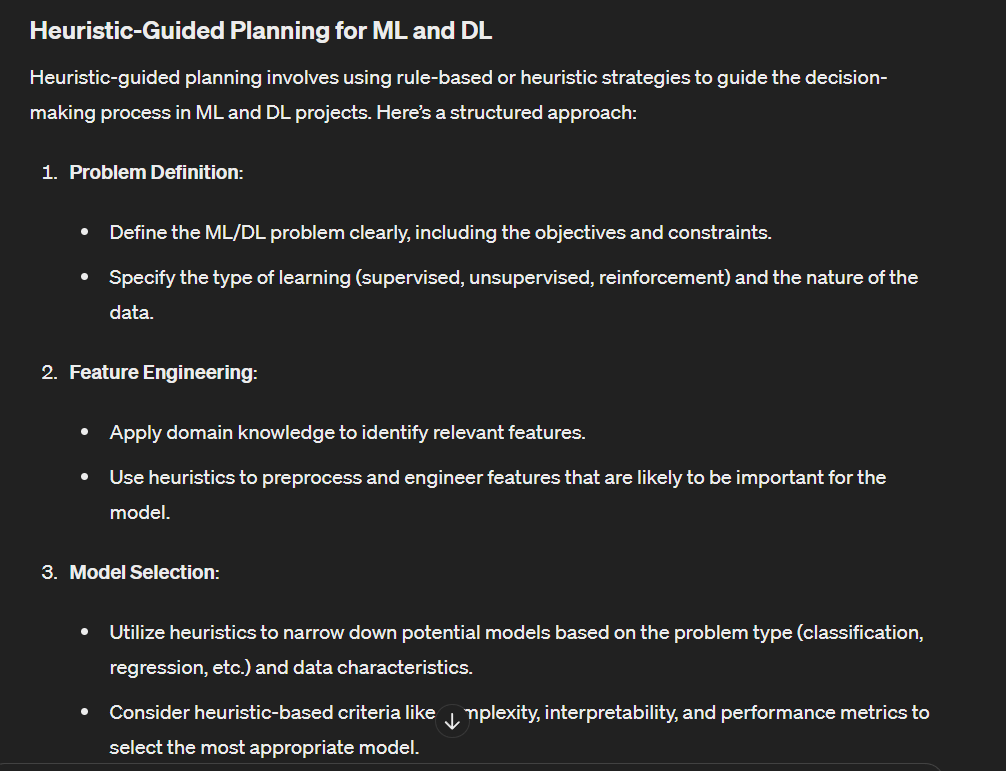

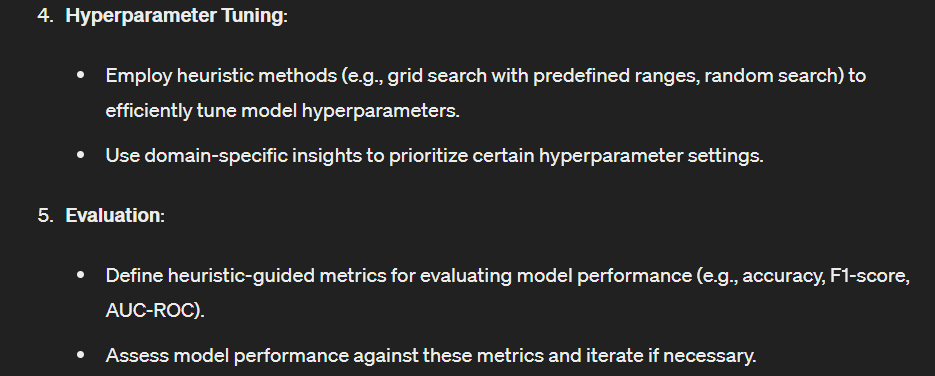

Problem Definition and Data Preparation

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (normalize data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Selection and Training

In [3]:
# Define a simple Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 classes (Iris species)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_split=0.1, verbose=1)

Epoch 1/50
14/14 [==============================] - 4s 62ms/step - loss: 1.1154 - accuracy: 0.3889 - val_loss: 1.0188 - val_accuracy: 0.4167
Epoch 2/50
14/14 [==============================] - 0s 7ms/step - loss: 1.0180 - accuracy: 0.4907 - val_loss: 0.9726 - val_accuracy: 0.5000
Epoch 3/50
14/14 [==============================] - 0s 12ms/step - loss: 0.9320 - accuracy: 0.5556 - val_loss: 0.9300 - val_accuracy: 0.5000
Epoch 4/50
14/14 [==============================] - 0s 11ms/step - loss: 0.8581 - accuracy: 0.6667 - val_loss: 0.8894 - val_accuracy: 0.5833
Epoch 5/50
14/14 [==============================] - 0s 14ms/step - loss: 0.7897 - accuracy: 0.7593 - val_loss: 0.8492 - val_accuracy: 0.7500
Epoch 6/50
14/14 [==============================] - 0s 22ms/step - loss: 0.7273 - accuracy: 0.7593 - val_loss: 0.8101 - val_accuracy: 0.7500
Epoch 7/50
14/14 [==============================] - 0s 17ms/step - loss: 0.6759 - accuracy: 0.8056 - val_loss: 0.7737 - val_accuracy: 0.6667
Epoch 8/50
14/

Hyperparameter Tuning and Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create a Keras model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap Keras model for use with scikit-learn GridSearchCV
keras_model = KerasClassifier(build_fn=create_model, verbose=0)

# Define hyperparameters to search
param_grid = {
    'epochs': [50, 100],
    'batch_size': [8, 16],
    'optimizer': ['adam', 'rmsprop']
}

# Perform grid search for hyperparameter tuning
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

# Print best hyperparameters and accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("Test Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))